# Bar Charts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Creating a pandas DataFrame
data = {
    'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
    'Values': [25, 40, 15, 30]
}

df = pd.DataFrame(data)

In [61]:
def plot_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'viridis',
                   title: str = None, horizontal: bool = False, show_mean_median: bool = False) -> None:
    """
    Generate a bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal bar chart.
                                     Default is False (vertical bar chart).
        show_mean_median (bool, optional): If True, the mean and median values will be displayed in the top-right
                                           corner of the chart with a frame. Default is False.

    Returns:
        None: The function displays the bar chart directly without returning anything.

    Example:
        # Example DataFrame
        data = {
            'Categories': ['Category A', 'Category B', 'Category C', 'Category D'],
            'Values': [25, 40, 15, 30]
        }

        df = pd.DataFrame(data)

        # Using the function to create a vertical bar chart without mean and median
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma', title='Vertical Bar Chart')

        # Using the function to create a vertical bar chart with mean and median displayed
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma',
                       title='Vertical Bar Chart with Mean and Median', show_mean_median=True)

        # Using the function to create a horizontal bar chart without mean and median
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma', title='Horizontal Bar Chart', horizontal=True)

        # Using the function to create a horizontal bar chart with mean and median displayed
        plot_bar_chart(dataframe=df, x_column='Categories', y_column='Values', colormap='plasma',
                       title='Horizontal Bar Chart with Mean and Median', horizontal=True, show_mean_median=True)
    """

    # Step 1: Sort the DataFrame by the y_column in descending order
    df = dataframe.sort_values(by=y_column, ascending=False)

    # Create the bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    if horizontal:
        plt.barh(df[x_column], df[y_column], color=plt.get_cmap(colormap)(df[y_column] / max(df[y_column])))
        plt.xlabel(y_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)
    else:
        plt.bar(df[x_column], df[y_column], color=plt.get_cmap(colormap)(df[y_column] / max(df[y_column])))
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(y_column, labelpad=15, color='#333333', fontsize=14)

    # Display mean and median values if show_mean_median is True
    if show_mean_median:
        # Calculating mean and median
        mean_value = df[y_column].mean()
        median_value = df[y_column].median()

        # Adding mean and median values in the top-right corner of the chart with a frame
        text_to_display = f'Mean: {mean_value:.2f}\nMedian: {median_value:.2f}'
        plt.text(0.95, 0.95, text_to_display, transform=plt.gca().transAxes,
                 ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    if title:
        plt.title(title, fontweight='bold', fontsize=18, pad=15, color='#333333')

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()


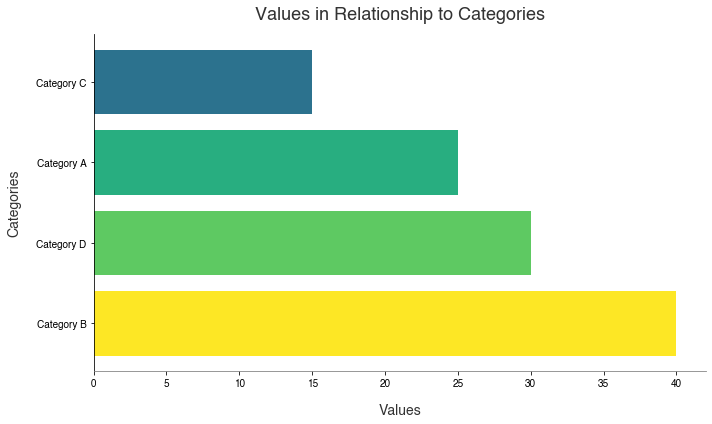

In [62]:
plot_bar_chart(df, 'Categories', 'Values', title= 'Values in Relationship to Categories', horizontal=True)

# Stacked Bar charts

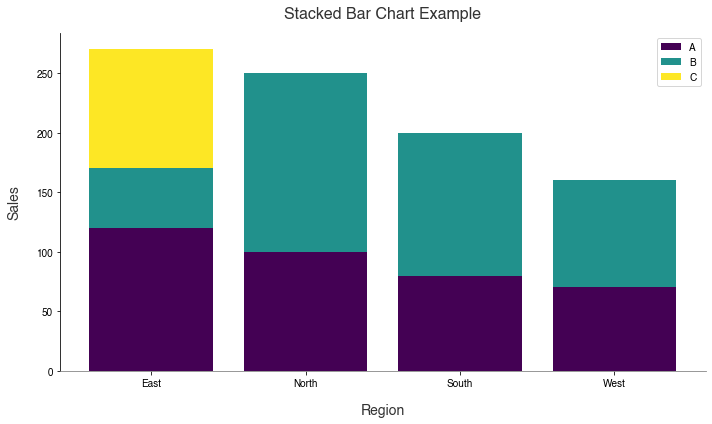

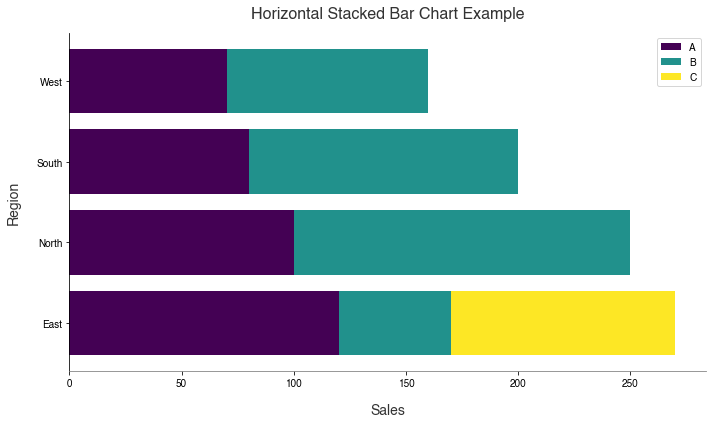

In [108]:
def plot_stacked_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                           title: str = None, horizontal: bool = False, colormap: str = 'viridis') -> None:
    """
    Generate a stacked bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the stacked bars.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, the chart will be displayed as horizontal stacked bars.
                                     If False, the chart will be displayed as vertical stacked bars (default).
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.

    Returns:
        None: The function displays the stacked bar chart directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the stacked bar chart
    pivot_df = dataframe.pivot(index=x_column, columns=group_column, values=values_column)

    # Create the stacked bar chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of unique categories in the group_column
    num_categories = pivot_df.shape[1]
    colormap = plt.cm.get_cmap(colormap, num_categories)

    if horizontal:
        # Plotting the horizontal stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.barh(pivot_df.index, pivot_df[column], left=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for horizontal chart
        plt.xlabel(values_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(x_column, labelpad=15, color='#333333', fontsize=14)

    else:  # Vertical stacked bars (default)
        # Plotting the vertical stacked bars
        bottom = None
        for i, column in enumerate(pivot_df.columns):
            plt.bar(pivot_df.index, pivot_df[column], bottom=bottom, color=colormap(i), label=column)
            if bottom is None:
                bottom = pivot_df[column]
            else:
                bottom += pivot_df[column]

        # Adding labels and title for vertical chart
        plt.xlabel(x_column, labelpad=15, color='#333333', fontsize=14)
        plt.ylabel(values_column, labelpad=15, color='#333333', fontsize=14)

    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend(pivot_df.columns)

    # Remove top, right, and left spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)

    # Making the bottom spine gray
    plt.gca().spines['bottom'].set_color('gray')

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a vertical stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Stacked Bar Chart Example')

# Using the function to create a horizontal stacked bar chart
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Horizontal Stacked Bar Chart Example', horizontal=True)


# Line Chart

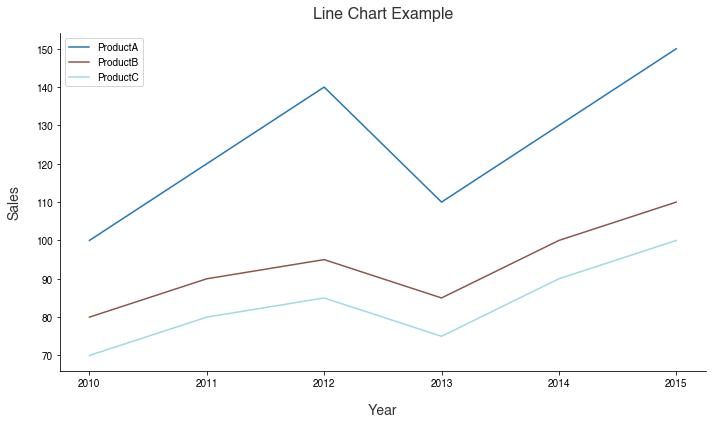

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(y_columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    for i, column in enumerate(y_columns):
        plt.plot(dataframe[x_column], dataframe[column], color=colormap(i), label=column)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    plt.legend()

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a line chart with multiple lines
plot_line_chart(dataframe=df, x_column='Year', y_columns=['ProductA', 'ProductB', 'ProductC'],
                title='Line Chart Example', xlabel='Year', ylabel='Sales')


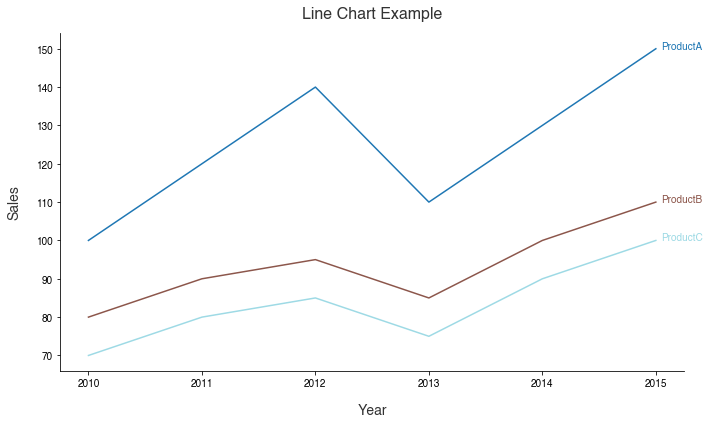

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using matplotlib
    plt.figure(figsize=(10, 6))

    # Generate colormap dynamically based on the number of lines to plot
    num_lines = len(y_columns)
    colormap = plt.cm.get_cmap(colormap, num_lines)

    for i, column in enumerate(y_columns):
        plt.plot(dataframe[x_column], dataframe[column], color=colormap(i), label=column)
        # Annotate the end of each line with the label
        plt.annotate(f"{column}", xy=(dataframe[x_column].iloc[-1], dataframe[column].iloc[-1]),
                     xytext=(5, 0), textcoords='offset points', color=colormap(i))

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel, labelpad=15, color='#333333', fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, labelpad=15, color='#333333', fontsize=14)
    if title:
        plt.title(title, fontweight='bold', fontsize=16, pad=15, color='#333333')

    # Adding legend
    #plt.legend()

    # Remove top and right spines (figure borders)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Display the plot
    plt.tight_layout()  # Ensure all elements fit within the figure
    plt.show()

# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a line chart with multiple lines
plot_line_chart(dataframe=df, x_column='Year', y_columns=['ProductA', 'ProductB', 'ProductC'],
                title='Line Chart Example', xlabel='Year', ylabel='Sales')


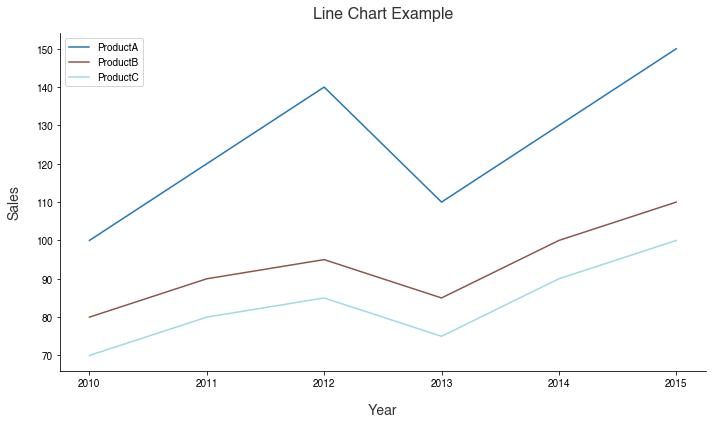